<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/TextSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving beer_concept_500_8777docs.json to beer_concept_500_8777docs.json


In [4]:
import json
with open('beer_concept_500_8777docs.json') as f:
    inp = json.load(f)

In [45]:
concepts = []
for item in inp:
  concepts.append(item['texts'][0])

In [38]:
#Test code - Concept Search
for item in concepts:
  if item == 'coffee':
    print('Yes')

Yes


**SBERT**

In [ ]:
%pip install -U sentence-transformers

In [7]:
from sentence_transformers import SentenceTransformer, util

In [8]:
%%capture
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
"2009 12oz. bottle served into a Gulden Draak tulip Pours burnt orange/copper with a one-finger sized porcelain-white head. The beer laces well, with sudsy patterns. Attractive and well-executed. The nose opens with a grenade blast of hops. Devil Dancer doesn't really smell floral like many heavily hopped beers do. The hop bouquet is more resiny and oily. This beer smells bitter, if that makes any sense. Its almost as if I'm experiencing the strength of a normal IPA's hop flavors on the tongue... only I'm experiencing that level of strength purely through my nose. This beer was also less boozy than I expected, but the alcohol is present nonetheless. The word doesn't do Devil Dancer justice. Not quite. This beer is sublimely hoppy. Mango and pineapple are strong initially" 

In [13]:
target = 'coffee'
emb_target = model.encode(target)

In [ ]:
emb_target

In [14]:
emb_corpus = model.encode(concepts)
cosine_scores = util.cos_sim(emb_target, emb_corpus)
arr = cosine_scores.numpy().flatten().tolist()

In [12]:
emb_corpus.shape

(500, 384)

In [15]:
arr = cosine_scores.numpy().flatten().tolist()
simularity = list(zip(arr,concepts))
sorted(simularity, reverse = True)[:20]

[(1.0, 'coffee'),
 (0.8155989646911621, 'roasted coffee'),
 (0.764582633972168, 'chocolate and coffee'),
 (0.5764206051826477, 'drink'),
 (0.5076597332954407, 'brew'),
 (0.5041046142578125, 'cocoa'),
 (0.5009302496910095, 'sip'),
 (0.4966921806335449, 'juice'),
 (0.4879511296749115, 'espresso'),
 (0.4644039273262024, 'drinkable'),
 (0.4570234715938568, 'session beer'),
 (0.4553448557853699, 'brewpub'),
 (0.4476625919342041, 'cream'),
 (0.4450848400592804, 'refreshing'),
 (0.437473326921463, 'easy to drink'),
 (0.4294916093349457, 'vanilla'),
 (0.421149343252182, 'sipper'),
 (0.4197905659675598, 'dark chocolate'),
 (0.4186149835586548, 'Drinkability'),
 (0.414207398891449, 'buttery')]

In [67]:
arr = cosine_scores.numpy().flatten().tolist()
len(arr)

500

# PCA Experiments

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [ ]:
# visualization code - PCA
def PCA_plot(emb):
  pca = PCA(n_components=2)
  #Creates and PCA model and plots it
  principal_comp = pca.fit_transform(emb)

  x = []
  y = []
  for value in principal_comp:
    x.append(value[0])
    y.append(value[1])

In [ ]:
  plt.figure(figsize=(16, 16)) 
  #Outputting all the embeddings
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
  plt.show()

In [11]:
#PCA
pca = PCA(n_components=2)

In [ ]:
#PCA
principal_comp = pca.fit_transform(emb_corpus)

In [22]:
concepts_PCA_dict = {}
for ind, item in enumerate(concepts):
  concepts_PCA_dict[item] = principal_comp[ind]

In [25]:
cosine_scores_PCA = util.cos_sim(concepts_PCA_dict['coffee'], principal_comp)
simm_PCA = cosine_scores_PCA.numpy().flatten().tolist()

In [28]:
simularity = list(zip(simm_PCA,concepts))
sorted(simularity, reverse = True)[:20]

[(1.0000001192092896, 'coffee'),
 (0.9999927282333374, 'mouth'),
 (0.9999885559082031, 'licorice'),
 (0.9997669458389282, 'brown ale'),
 (0.9997032284736633, 'barleywine'),
 (0.9996111392974854, 'bitter'),
 (0.999382734298706, 'toasted malt'),
 (0.998779296875, 'nice lacing'),
 (0.9975904822349548, 'bite'),
 (0.997313380241394, 'lacing on the glass'),
 (0.9953543543815613, 'blend'),
 (0.9925642013549805, 'wine'),
 (0.9917826056480408, 'sticky lacing'),
 (0.9883390069007874, 'toasted'),
 (0.9883090257644653, 'resin'),
 (0.9881381988525391, 'medicinal'),
 (0.988008975982666, 'charred'),
 (0.9877126216888428, 'Belgian yeast'),
 (0.9873654842376709, 'mouthfeel'),
 (0.987271785736084, 'boozy')]

**Using Luminoso Embeddings**

In [6]:
emb_lumi = []
for item in inp:
  emb_lumi.append(item['vect_unpacked'])

In [33]:
emb_lumi_np = np.array(emb_lumi)

In [12]:
principal_comp_lumi = pca.fit_transform(emb_lumi)

In [32]:
concepts_PCA_dict_lumi = {}
for ind, item in enumerate(concepts):
  concepts_PCA_dict_lumi[item] = principal_comp_lumi[ind]

In [34]:
cosine_scores_PCA_lumi = util.cos_sim(concepts_PCA_dict_lumi['coffee'], principal_comp_lumi)
simm_PCA_lumi = cosine_scores_PCA_lumi.numpy().flatten().tolist()

In [35]:
simularity_lumi = list(zip(simm_PCA_lumi,concepts))
sorted(simularity_lumi, reverse = True)[:20]

[(1.0, 'coffee'),
 (0.9999999735019952, 'sweet caramel'),
 (0.9999986180673384, 'molasses'),
 (0.9999983630024668, 'toffee'),
 (0.9999895939722754, 'juice'),
 (0.9999893426717319, 'raisins'),
 (0.9999726020504714, 'toasted'),
 (0.9999197298688025, 'skunky'),
 (0.999764850430487, 'pine'),
 (0.9997203223434928, 'watery'),
 (0.9994789928346032, 'floral'),
 (0.999439472863176, 'lemon'),
 (0.9992786755260545, 'ripe'),
 (0.9990144230955154, 'rind'),
 (0.9989942644308821, 'brown sugar'),
 (0.9989744923354216, 'charred'),
 (0.9985956816196455, 'smoky'),
 (0.9984359233790073, 'candy'),
 (0.9983895132245233, 'grass'),
 (0.9982901086876159, 'cinnamon')]

**UMAP Projection & KNN Clustering**

In [ ]:
!pip install umap-learn

In [28]:
import umap

In [34]:
def umap_reducer(neighbors, emb):
  reducer = umap.UMAP(n_neighbors=10) 
  return reducer.fit_transform(emb)

In [35]:
emb_umap = umap_reducer(10, emb_lumi_np)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [13]:
from sklearn.cluster import KMeans

In [14]:
# Pick the number of clusters
n_clusters=8

# Cluster the embeddings
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes = kmeans_model.fit_predict(principal_comp_lumi)

In [24]:
len(classes)

500

In [18]:
labels = classes.tolist()

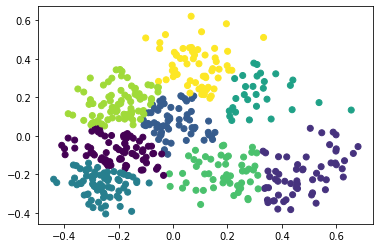

In [26]:
#Scatter plot PCA
plt.scatter(x=principal_comp_lumi[:,0],
            y=principal_comp_lumi[:,1],
            c=labels)

In [39]:
# Pick the number of clusters
n_clusters=8

# Cluster the embeddings UMAP
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes_UMAP = kmeans_model.fit_predict(emb_umap)

In [40]:
labels_UMAP = classes_UMAP.tolist()

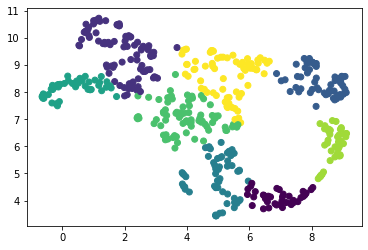

In [44]:
#Scatter Plot UMAP
plt.scatter(x=emb_umap[:,0],
            y=emb_umap[:,1],
            c=labels_UMAP)

In [46]:
# Cluster labels
df_umap = pd.DataFrame({'CONCEPT': concepts, 'LABEL': labels_UMAP})

In [ ]:
df_umap.loc[df_umap['LABEL'] == 2]

# Useful code snippets

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
type(digits.data)

In [ ]:
import json
with open('beer_concept_500.json', 'w', encoding='utf-8') as f:
    json.dump(res_['result'], f, ensure_ascii=False, indent=4)

In [ ]:
from scipy.spatial import distance

distance.cosine(item,target)

In [ ]:
pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

In [73]:
# importing the module
import pandas as pd

In [79]:
#dataframe to TSV
  
# creating some sample data
sample = {'text': concepts,
         'embedding': emb_corpus.tolist()}

In [ ]:
# creating the DataFrame
df = pd.DataFrame(sample)
  
# displaying the DataFrame
df.head()

In [87]:
df.to_csv('beer_500.tsv', sep="\t")

In [39]:
import csv

In [40]:
with open('output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    for item in emb_corpus.tolist():
      tsv_output.writerow(item)

In [47]:
with open('meta.tsv', 'w') as f_output:
    for item in concepts:
      f_output.write("{}\n".format(item))